#Kumar_Janani_ps1



In [46]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib 
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Mapltolib version:     1.5.3 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# reading the csv files and indexing by the first column.
flights_df= pd.read_csv("C:/Users/jakum/Documents/Quarter 3/ml/assignments/flights.csv",index_col=0)
weather_df= pd.read_csv("C:/Users/jakum/Documents/Quarter 3/ml/assignments/weather.csv",index_col=0)
flights_df=flights_df.sort(['month','day'], ascending=[1,1])
weather_df=weather_df.sort(['month','day'],ascending=[1,1])

C:\Users\jakum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\jakum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [49]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)
print (flights_df.head(10))

(336776, 16)
Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object
    year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
1   2013      1    1     517.0        2.0     830.0       11.0      UA   
2   2013      1    1     533.0        4.0     850.0       20.0      UA   
3   2013      1    1     542.0        2.0     923.0       33.0      AA   
4   2013      1    1     544.0       -1.0    1004.0      -18.0      B6   
5   2013      1    1     554.0       -6.0     812.0      

In [50]:
flights_df.dest.unique()
flights_df.head(10)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [59]:

flights_df.dest.unique()
nyctosea_count=pd.value_counts(flights_df.dest=='SEA') #this count gives the number of flights from NYC to Seattle
#The following lines of code are to create a dataframe with records of flights from NYC to Seattle.
Nyc_To_Sea=flights_df.loc[(flights_df.dest=='SEA')]
#Shape of the new dataframe can be used to confirm the count obtained earlier.
Nyc_To_Sea.shape


(3923, 16)

 There are 3923 flights from NYC to Seattle.

(b) How many airlines fly from NYC to Seattle?

In [53]:

#using the unique function, carrier information is obtained and sum function on top of it gives the total number
#of carriers from NYC to Seattle
sum(pd.value_counts(Nyc_To_Sea.carrier.unique()))
            

5

There are 5 flights from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [54]:

#Here tail number is used to identify unique planes and tail number is assigned to every registered flight by FAA and is
#unique to each.
sum(pd.value_counts(Nyc_To_Sea.tailnum.unique()))
#Flight number is also a unique way to identify flights. Flight number are assigned to the plane by the airlines.
sum(pd.value_counts(Nyc_To_Sea.flight.unique()))

166

 935 unique planes flew from NYC to Seattle (by tailnumber)
 166 unique flights flew from NYC to Seattle( by the flight number)

(d) What is the average arrival delay for flights from NC to Seattle?

In [55]:
# Your code here
#Using mean function to compute average arrival delay
Nyc_To_Sea.arr_delay.mean()

-1.0990990990990992

On an average, flights from NYC to Seattle arrive early by 1.0990 sec. This can be inferred from the negative sign associated with average.

(e) What proportion of flights to Seattle come from each NYC airport?

In [61]:
# Your code here
# Count of each airport divided by total number of flights will give the proportion of each airport. Multiplying by 100
#for %
(pd.value_counts(Nyc_To_Sea.origin)/3923)*100

JFK    53.326536
EWR    46.673464
Name: origin, dtype: float64

 Out of 3923 flights to seattle,53.3 % came out of JFK and 46.67 came out of EWR.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [62]:
# Creating delay_q2 dataframe with data from primary dataframe indexed by month and day.
delay_q2=pd.DataFrame(flights_df.groupby([flights_df.month,flights_df.day]).mean())
# printing details of the record that had maximum average delparture delay and largest average arrival delay
print(delay_q2.loc[delay_q2.dep_delay==max(delay_q2.dep_delay)])
print(delay_q2.loc[delay_q2.arr_delay==max(delay_q2.arr_delay)])
delay_q2.head()

             year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
3     8    2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  
             year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
3     8    2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  


year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
1     1    2013.0  1384.991647  11.548926  1562.344086  12.651023   
      2    2013.0  1353.960428  13.858824  1532.729904  12.692888   
      3    2013.0  1356.665929  10.987832  1536.290929   5.733333   
      4    2013.0  1347.856986   8.951595  1519.116612  -1.932819   
      5    2013.0  1326.089261   5.732218  1509.136681  -1.525802   

                flight    air_time     distance       hour     minute  
month day                                                              
1     1    1821.496437  169.652226  1077.429929  13.538186  31.173031  
      2    1917.732768  162.198276  1053.117709  13.228877  31.072727  
      3    1913.176149  156.593333  1037.370897  13.253319  31.334071  
      4    1930.147541  150.997797  1032.475410  13.171617  30.695270  
      5    1740.019444  160.792190  1067.591667  12.949791  31.110181

 8th of March 2013 has the highest departure delay and arrival delay.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [63]:
# The worst day to fly out of NYC in 2013 will be the one with highest average departure delay
#In this case it is March 8th as seen in the previous question.
print(delay_q2.loc[delay_q2.dep_delay==max(delay_q2.dep_delay)])

             year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
3     8    2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  


March 8th.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64
2013-01-01    10.036650
2013-01-02    10.816843
2013-01-03    13.227076
2013-01-04    13.938038
2013-01-05    12.986859
2013-01-06    20.846332
2013-01-07    21.727787
2013-01-08    12.611040
2013-01-09     6.722476
2013-01-10     6.243988
2013-01-11     5.435362
2013-01-12    16.576688
Freq: D, dtype: float64


(-10, 30)

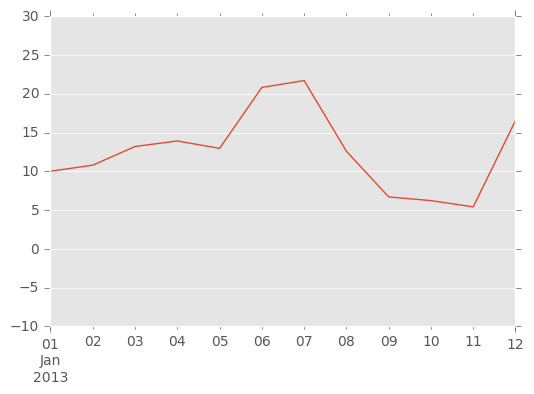

In [101]:
# Your code here
matplotlib.style.use('ggplot')
#To analyze seasonal delay, average departure delay is plotted against each month of the year 2013
delay_q3=pd.DataFrame(flights_df.groupby([flights_df.month]).mean())
print (delay_q3.dep_delay)
ts = pd.Series([10.03665,10.816843,13.227076,13.938038,12.986859,20.846332,21.727787,12.611040,6.722476,6.243988,5.435362,16.576688],index=pd.date_range('1/1/2013',periods=12))
print (ts)
ts.plot()
plt.ylim([-10,30])


Inference from graph1: Theflights that get delayed the most are during June, july, december,august and a little above normal in april.
June and July can stand for summer (hot air makes it difficult for flights) and december could be again due to weather. The fact that these months are holiday seasons can also add to the load.

(d) On average, how do departure delays vary over the course of a day?

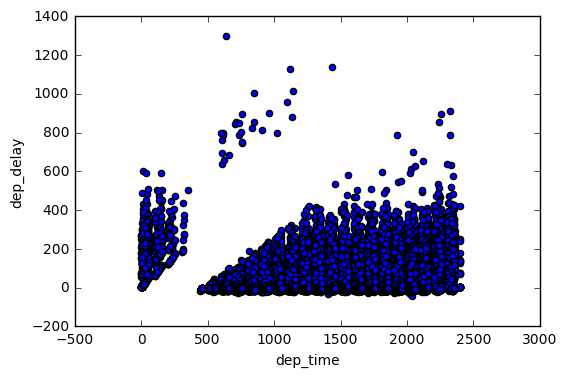

In [35]:
# Your code here
#to answer this question, analysis is done to find a time of the day when delays are the highest and lowest.
flights_df.plot.scatter(x='dep_time',y='dep_delay')


As it can be observed from the graph, departure delay seems to be mostly uniformly distributed irrespective of the time the flight is scheduled to take off. However, on a closer look, there seems to be a increase in delay from 5:00 am in the morning to 10:00 am in the morning and sparce increase in delay in the afternoon till midnight. The flights with maximum delays are in the mornings(5 am to 10 am) and late nights(11 pm to 12 pm).  

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [35]:
# Speed=distance/time
#Computing speed for each flight. Here, those flights with NA or those with erroneous data(hour & minute=0)are not accounted for
flights_df1=flights_df.loc[(flights_df.hour>0)]
flights_df1.shape
#Adding column speed. speed is converted to minutes.
flights_df1.speed=flights_df1.distance/(flights_df1.hour*60+flights_df1.minute)
#nlargest function used to get the maximum value.
print( flights_df1.speed.nlargest(1))
print (flights_df1.loc[(flights_df1.speed==41.25)])

250460    41.25
dtype: float64
        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
250460  2013      7    1     100.0      135.0     337.0      122.0      B6   

       tailnum  flight origin dest  air_time  distance  hour  minute  
250460  N663JB     623    JFK  LAX     304.0      2475   1.0     0.0  


Flight 623 from JFK to LAX flew the fastest on July 1st. 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [34]:
# Your code here
#frequency of flights is required to understand this.
sum(pd.value_counts(flights_df.flight.unique()))
#There are 4043 unique flights flying from NYC to various destinations.
#Indexing dataframe by carrier, flight and dest
everyday_flight=pd.DataFrame(flights_df.groupby([flights_df.carrier,flights_df.flight,flights_df.dest]).sum())
print (everyday_flight.head(5))
#sum function is used to help identify days. If a flight were to fly everyday then, it will be counted 365 times.
#i.e day=(1+2+3..+31)*6(no of months with 31 days) + (1+2+3+..30)*6(no of months with 30 days)
#the value of day in everyday_flight dataframe if a flight were to happen every day is computed below
#So the flights with maximum value for day in everyday_flight fly the most frequently
#Output of the following statement gives the details of all the flights that fly most frequently with their destination
#details.
print(everyday_flight.loc[everyday_flight.day==max(everyday_flight.day)])

                       year  month   day  dep_time  dep_delay  arr_time  \
carrier flight dest                                                       
AA      59     SFO   734745   2382  5738  274289.0     1119.0  392907.0   
        119    LAX   734745   2382  5738  662746.0     2116.0  776105.0   
        181    LAX   734745   2382  5738  614741.0     6891.0  716862.0   
        1357   SJU   734745   2382  5738  307909.0      864.0  467202.0   
        1611   MIA   734745   2382  5738  652463.0     5023.0  753622.0   
B6      219    CLT   734745   2382  5738  298202.0     1459.0  371328.0   
        359    BUR   734745   2382  5738  641730.0     4910.0  738709.0   
        371    FLL   734745   2382  5738  202570.0    -1150.0  308109.0   
        431    SRQ   734745   2382  5738  487372.0     3795.0  598455.0   
        703    SJU   734745   2382  5738  555603.0     5628.0  707022.0   
        1783   MCO   734745   2382  5738  426206.0     3401.0  528052.0   
DL      2159   MCO   7347

There are 18 flights that fly very frequently. Details of these flights with the destinations they fly to are displayed above. They fly to destinations such as SFO,LAX,SJU,BUR etc. 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


(32000, 35005)

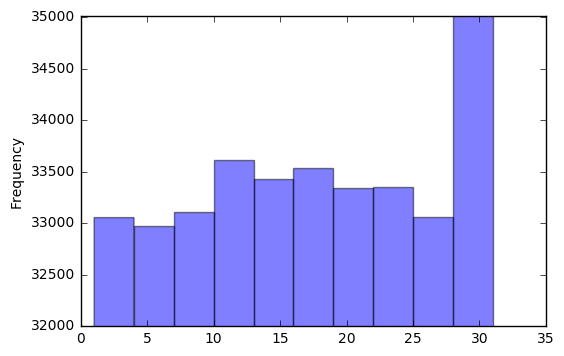

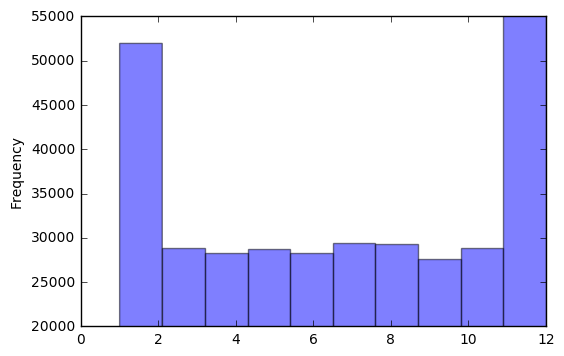

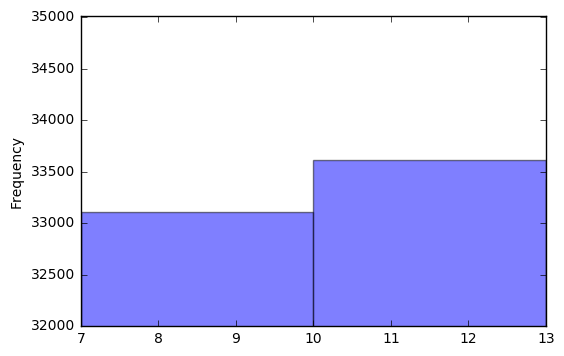

In [64]:
# Your code here
#Do more number of flights take of during weekends and during months of holidays
#Viz1: Frequency of flights over any month.
flights_df['day'].plot.hist(alpha=0.5)
plt.ylim([32000,35005])
plt.figure()
#Viz2: Frequency of flights over the year
flights_df['month'].plot.hist(alpha=0.5)
plt.ylim([20000,55000])
plt.figure()
#Viz3: Frequency of flights over a week. In 2013, the first Monday was the 7th Jan, hence 7 to 13 is used for analysis
flights_df['day'].plot.hist(alpha=0.5)
plt.xlim([7,13])
plt.ylim([32000,35005])

Research Question: Does the number of flights flying out of NYC change according to the period of the year, month and week? To analyse this, 3 vizualisations have been produced. 
Viz1 : It can be observed that end of the month seems to be a busy time where number of flights flying out of NYC increase by a high number
Viz2: It can be observed that January and December are very busy months of the year in terms of flying.
Viz3: It can be observed that airports get busier in the second half of the week.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

(-10, 40)

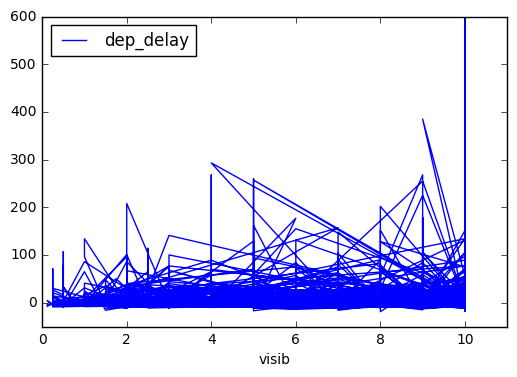

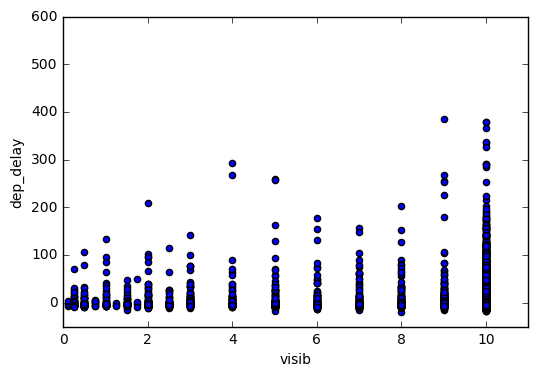

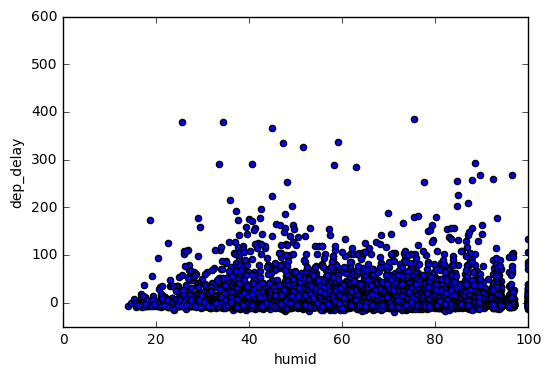

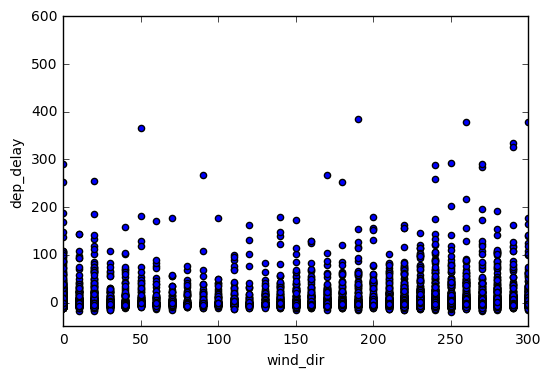

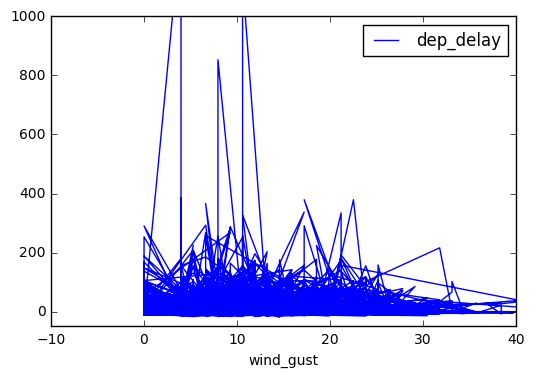

In [34]:
# Your code here
#Weather factors chosen for analysis against flight delay : Wind, rain and visibility.
#to analyse weather and flight data to gether, both a dataframes are concatenated on the index.
frames=[flights_df,weather_df]
result_merge=pd.concat(frames,axis=1)
result_merge.shape
result_merge.head()
result_merge.dtypes
min(flights_df.dep_delay)
max(flights_df.dep_delay)
#Viz 1: Visibility vs delay
result_merge.plot(x='visib',y='dep_delay')
plt.ylim([-50,600])
plt.xlim([0,11])
result_merge.plot.scatter(x='visib',y='dep_delay')
plt.ylim([-50,600])
plt.xlim([0,11])
#Viz 2: Humidity vs delay
result_merge.plot.scatter(x='humid',y='dep_delay')
plt.ylim([-50,600])
plt.xlim([0,100])
#Viz 3: Wind direction and delay
result_merge.plot.scatter(x='wind_dir',y='dep_delay')
plt.ylim([-50,600])
plt.xlim([0,300])
#Viz 4: Wind speed and delay
result_merge.plot(x='wind_gust',y='dep_delay')
plt.ylim([-50,1000])
plt.xlim([-10,40])

From the first viz we find that delays seem to increase when the visibility is maximum. In the humidity graph we see that maximum delay seems to occur when the humity is the lowest. From the wind gust viz we see that, maximum elay occurs seems to occur when there is low wind gust. Though none of the patterns are strong, given our previous finding that maximum delay occurs in the month of June, july and from these viz, it is safe to say that flight delays happen the most during summer. High heat makes it difficult for the plane to take off and damages internal component. This fact seems to resonate from the graphs.

SyntaxError: invalid syntax (<ipython-input-2-0bcdfde8f2a8>, line 1)